# Predicting On-time Delivery of Online Purchases
## Part III-B: Modeling - Naive Bayes Classifier
## AAI-510 Team 7 Final Project

Team 7:  Ken Devoe, Tyler Foreman, Geoffrey Fadera

University of San Diego, Applied Artificial Intelligence

Date:  June 24, 2024

GitHub Repository: https://github.com/kdevoe/aai510-group7

## Import Common Functions

In [1]:
%run shipping_common_functions.ipynb

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Preprocessed Data

In [3]:
# train data
X_train = pd.read_csv('./data/x_train.csv')
y_train = np.ravel(pd.read_csv('./data/y_train.csv'))

# val data
X_val = pd.read_csv('./data/x_val.csv')
y_val = np.ravel(pd.read_csv('./data/y_val.csv'))

In [4]:
# Check imported data
print('TRAIN SET:')
print('   X_train:', X_train.shape)
print('   y_train:', y_train.shape)
print('\nVALIDATION SET:')
print('   X_val:', X_val.shape)
print('   y_val:', y_val.shape)

TRAIN SET:
   X_train: (8799, 17)
   y_train: (8799,)

VALIDATION SET:
   X_val: (1100, 17)
   y_val: (1100,)


In [5]:
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.925605,5,-0.670120,-0.378680,1,-0.392911,0.311901,0,0,0,0,1,0,0,1,1,0
1,1.697108,3,-0.173246,0.273631,2,-0.638968,0.532606,1,0,0,0,0,0,0,1,1,0
2,-1.799843,5,1.379486,-0.378680,2,-0.454426,-1.585178,0,0,0,1,0,0,0,1,0,1
3,0.822870,5,0.178707,-1.030992,2,-0.577454,0.406052,0,0,1,0,0,0,0,1,0,1
4,1.697108,3,1.772845,0.273631,1,-0.577454,-1.207352,0,0,1,0,0,1,0,0,1,0


In [6]:
X_val.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_F,Gender_M
0,-0.051367,2,1.213861,-1.030992,2,-0.700483,0.237314,0,0,0,1,0,0,1,0,1,0
1,-0.051367,2,-0.421683,-0.378680,2,-0.392911,0.697675,1,0,0,0,0,0,1,0,0,1
2,-0.051367,1,-0.297464,-1.030992,1,-0.638968,0.689116,0,0,0,1,0,0,0,1,0,1
3,-0.925605,3,-0.152543,-0.378680,2,-0.392911,0.826674,0,0,0,1,0,1,0,0,0,1
4,0.822870,5,0.779096,0.925943,2,-0.331397,-1.066126,1,0,0,0,0,1,0,0,0,1


## Model 1: Naive Bayes Classifier

Naive bayes classifier to predict on-time shipments.

### Naive Bayes Classifier Baseline - No Tuning

In [7]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

### Model 1: Performance on Validation Set

In [8]:
# predict y values based on the validation set
y_pred1 = gnb_model.predict(X_val)

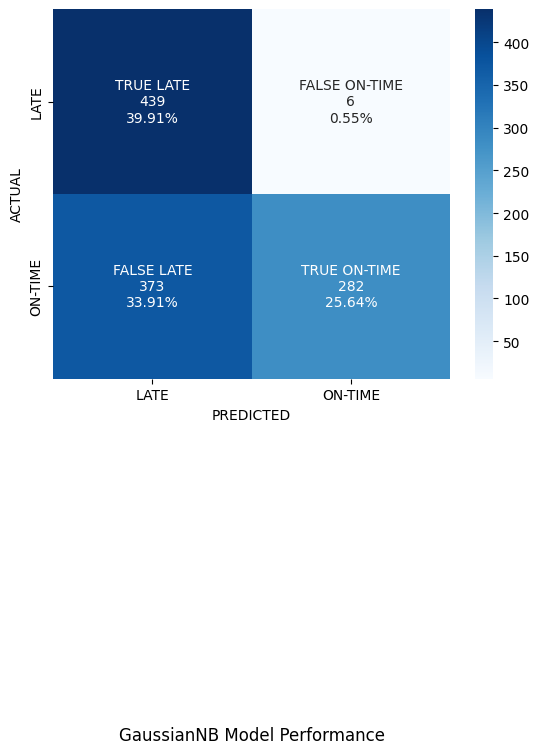

In [9]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1, title = 'GaussianNB Model Performance')

In [10]:
# Generate Classification Report for model 1
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1, title = 'GaussianNB')
    

              precision    recall  f1-score   support

        LATE       0.54      0.99      0.70       445
     ON-TIME       0.98      0.43      0.60       655

    accuracy                           0.66      1100
   macro avg       0.76      0.71      0.65      1100
weighted avg       0.80      0.66      0.64      1100



### Naive Bayes Classifier - Tuning

In [11]:
gnb_model_tune = GaussianNB()

In [27]:
# Define the parameter grid
gnb_param_grid = {
    'var_smoothing': [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]  # Smoothing parameter
}

In [28]:
gnb_grid_search = GridSearchCV(estimator=gnb_model_tune, param_grid=gnb_param_grid, scoring='accuracy', verbose=2, n_jobs=-1)

In [29]:
gnb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ...............................var_smoothing=0.0001; total time=   0.0s
[CV] END ................................var_smoothing=0.001; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoo

GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.001, 0.0001, 1e-05, 1e-06, 1e-07,
                                           1e-08, 1e-09, 1e-10, 1e-11]},
             scoring='accuracy', verbose=2)

In [30]:
# Print the best parameters and best score
print("Best Parameters:", gnb_grid_search.best_params_)
print("Best Score:", gnb_grid_search.best_score_)

Best Parameters: {'var_smoothing': 1e-05}
Best Score: 0.6496204584216239


In [31]:
gnb_best_model = gnb_grid_search.best_estimator_
y_pred1_tuned = gnb_best_model.predict(X_val)

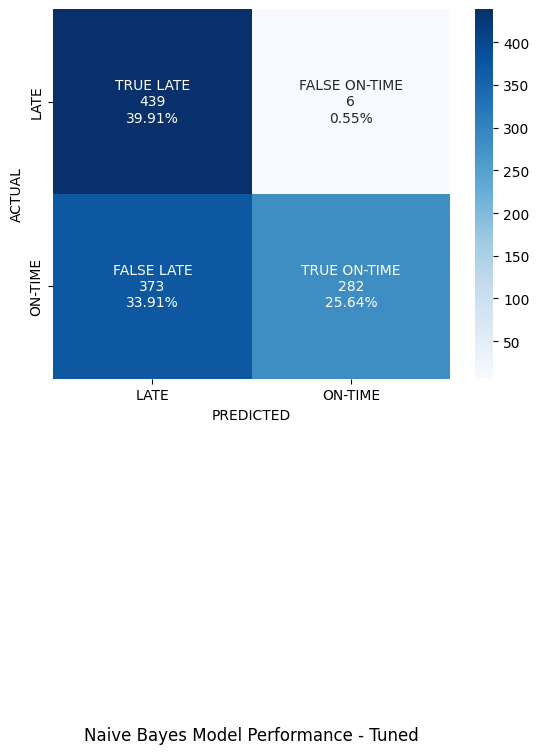

In [32]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred1_tuned, title = 'Naive Bayes Model Performance - Tuned')

In [33]:
# Generate Classification Report for model 1 Tuned
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred1_tuned, title = 'Naive Bayes - Tuned Hyperparameters')

              precision    recall  f1-score   support

        LATE       0.54      0.99      0.70       445
     ON-TIME       0.98      0.43      0.60       655

    accuracy                           0.66      1100
   macro avg       0.76      0.71      0.65      1100
weighted avg       0.80      0.66      0.64      1100



## Model 2: Support Vector Machine (SVM)

....

### Model 2: SVC Baseline - No Tuning

In [34]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Model 2: Performance on Validation Set

In [35]:
# predict y values based on the validation set
y_pred2 = svm_model.predict(X_val)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

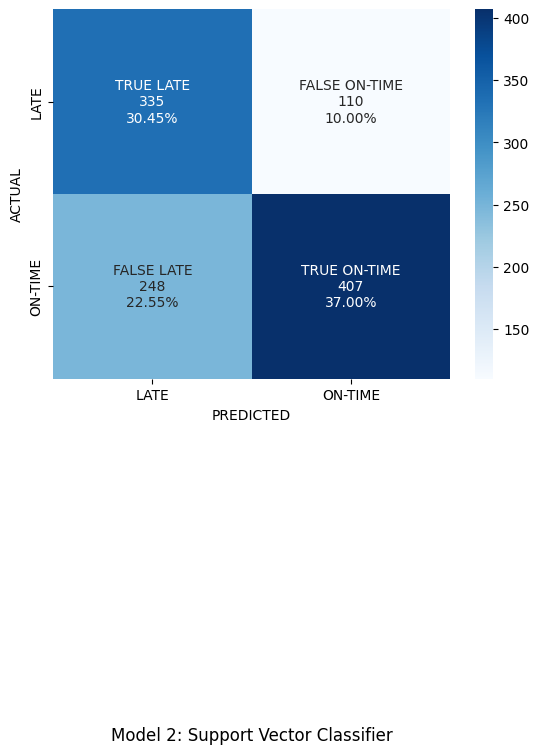

In [36]:
# generate confusion matrix for model2
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2, title = 'Model 2: Support Vector Classifier')

In [37]:
# Generate Classification Report for model 2
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2, title = 'Model 2: Support Vector Classifier')

              precision    recall  f1-score   support

        LATE       0.57      0.75      0.65       445
     ON-TIME       0.79      0.62      0.69       655

    accuracy                           0.67      1100
   macro avg       0.68      0.69      0.67      1100
weighted avg       0.70      0.67      0.68      1100



### SVC Tuning

In [38]:
svc_model_tune = SVC()

In [39]:
svc_param_grid = {
    'C': [0.01, .1, 1, 10],   # Regularization: Low C = high bias, low variance
    'gamma': [0.001, 0.01, 0.1, 1],  # High means focusing more on points close to decision boundary, low is smoother boundary
    'kernel': ['linear', 'rbf']   # Kernel type: Linear good for simple linearly seperable, otherwise radial basis function
}

In [40]:
svc_grid_search = GridSearchCV(estimator=svc_model_tune, param_grid=svc_param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
svc_grid_search.fit(X_train, y_train)

In [42]:
# Print the best parameters and best score
print("Best Parameters:", svc_grid_search.best_params_)
print("Best Score:", svc_grid_search.best_score_)

Best Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.6633724611091012


In [43]:
svc_best_model = svc_grid_search.best_estimator_
y_pred2_tuned = svc_best_model.predict(X_val)

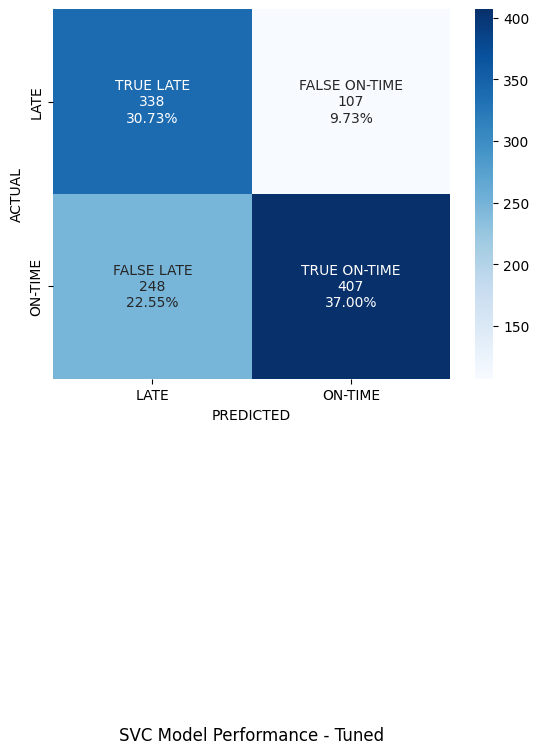

In [44]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred2_tuned, title = 'SVC Model Performance - Tuned')

In [45]:
# Generate Classification Report for model 2 Tuned
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred2_tuned, title = 'Support Vector Classifier - Tuned Hyperparameters')

              precision    recall  f1-score   support

        LATE       0.58      0.76      0.66       445
     ON-TIME       0.79      0.62      0.70       655

    accuracy                           0.68      1100
   macro avg       0.68      0.69      0.68      1100
weighted avg       0.70      0.68      0.68      1100



### SVC Tuning Set 2

In [49]:
svc_model_tune_2 = SVC()

In [50]:
svc_param_grid_2 = {
    'C': [0.02, 0.05, .1, 0.2, 0.5],   # Regularization: Low C = high bias, low variance
    'gamma': [0.002, 0.005, 0.01, 0.02, 0.05],  # High means focusing more on points close to decision boundary, low is smoother boundary
    'kernel': ['rbf']   # Kernel type: Linear good for simple linearly seperable, otherwise radial basis function
}

In [52]:
svc_grid_search_2 = GridSearchCV(estimator=svc_model_tune_2, param_grid=svc_param_grid_2, scoring='accuracy', verbose=2, n_jobs=-1)
svc_grid_search_2.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   2.8s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   2.7s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.02, gamma=0.002, kernel=rbf; total time=   2.7s
[CV] END ....................C=0.02, gamma=0.005, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.02, gamma=0.005, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.02, gamma=0.005, kernel=rbf; total time=   2.6s
[CV] END ....................C=0.02, gamma=0.005, kernel=rbf; total time=   2.5s
[CV] END ....................C=0.02, gamma=0.005, kernel=rbf; total time=   2.5s
[CV] END .....................C=0.02, gamma=0.01, kernel=rbf; total time=   2.5s
[CV] END .....................C=0.02, gamma=0.0

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.02, 0.05, 0.1, 0.2, 0.5],
                         'gamma': [0.002, 0.005, 0.01, 0.02, 0.05],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [53]:
# Print the best parameters and best score
print("Best Parameters:", svc_grid_search_2.best_params_)
print("Best Score:", svc_grid_search_2.best_score_)

Best Parameters: {'C': 0.05, 'gamma': 0.02, 'kernel': 'rbf'}
Best Score: 0.6642816166210139


In [54]:
svc_best_model_2 = svc_grid_search_2.best_estimator_
y_pred3_tuned = svc_best_model_2.predict(X_val)

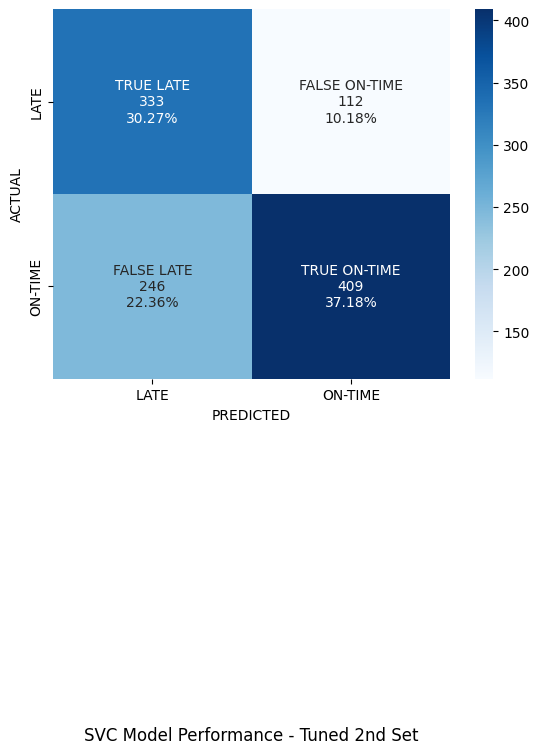

In [55]:
# generate confusion matrix for model1
aai510_grp7_confusion_matrix(y_true = y_val, y_pred = y_pred3_tuned, title = 'SVC Model Performance - Tuned 2nd Set')

In [56]:
# Generate Classification Report for model 3 Tuned
aai510_grp7_class_report(y_true = y_val, y_pred = y_pred3_tuned, title = 'Support Vector Classifier - Tuned Hyperparameters 2nd Set')

              precision    recall  f1-score   support

        LATE       0.58      0.75      0.65       445
     ON-TIME       0.79      0.62      0.70       655

    accuracy                           0.67      1100
   macro avg       0.68      0.69      0.67      1100
weighted avg       0.70      0.67      0.68      1100

